In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import umap
import warnings
warnings.filterwarnings("ignore")
# import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import os

https://www.kaggle.com/tomigelo/spotify-audio-features

In [16]:
df = pd.read_csv(r'C:\Users\Pat\Documents\Thinkful\Files\spotify_data.csv')

print(df.head())

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1   

In [17]:
df.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [18]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
artist,0,0.0
liveness,0,0.0
acousticness,0,0.0
danceability,0,0.0
duration_ms,0,0.0
energy,0,0.0
instrumentalness,0,0.0
key,0,0.0
loudness,0,0.0
song_title,0,0.0


acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
popularity   

Text(0.5, 1.0, 'valence')

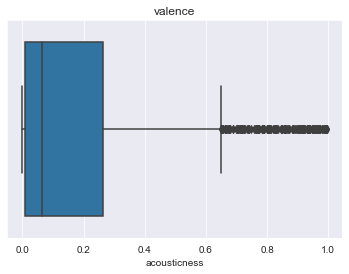

In [162]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']


sns.boxplot(x = features[0], data = df).set_title(t)

Text(0.5, 1.0, 'valence')

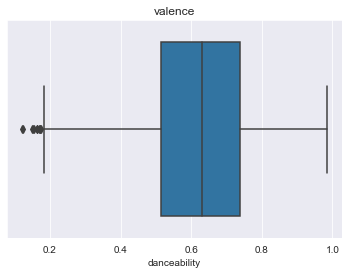

In [163]:
sns.boxplot(x = features[1], data = df).set_title(t)

Text(0.5, 1.0, 'valence')

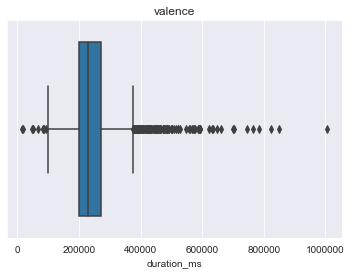

In [164]:
sns.boxplot(x = features[2], data = df).set_title(t)

Text(0.5, 1.0, 'valence')

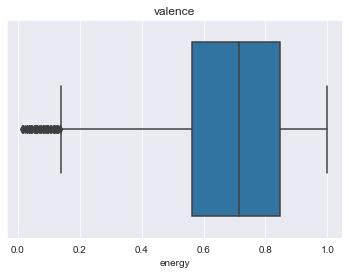

In [165]:
sns.boxplot(x = features[3], data = df).set_title(t)

Text(0.5, 1.0, 'valence')

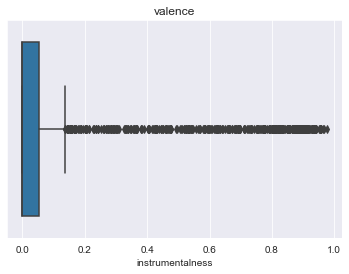

In [166]:
sns.boxplot(x = features[4], data = df).set_title(t)

Text(0.5, 1.0, 'valence')

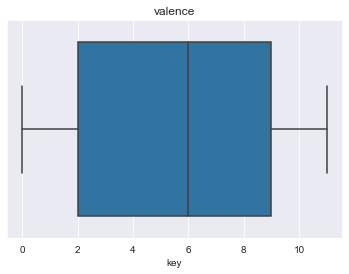

In [167]:
sns.boxplot(x = features[5], data = df).set_title(t)

Text(0.5, 1.0, 'valence')

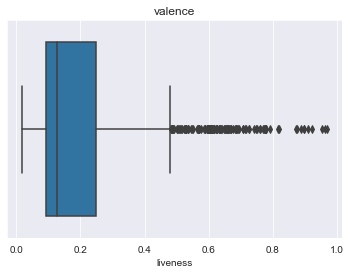

In [168]:
sns.boxplot(x = features[6], data = df).set_title(t)

Text(0.5, 1.0, 'valence')

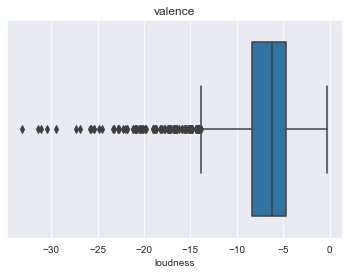

In [169]:
sns.boxplot(x = features[7], data = df).set_title(t)

Text(0.5, 1.0, 'valence')

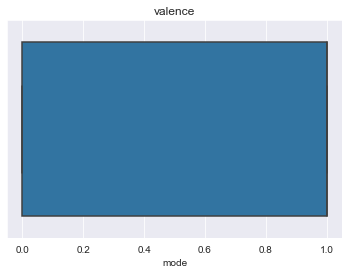

In [170]:
sns.boxplot(x = features[8], data = df).set_title(t)

Text(0.5, 1.0, 'valence')

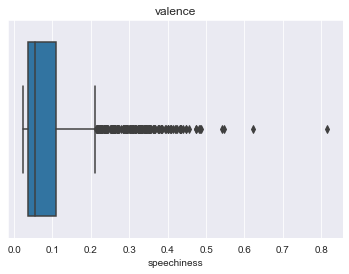

In [171]:
sns.boxplot(x = features[9], data = df).set_title(t)

Text(0.5, 1.0, 'valence')

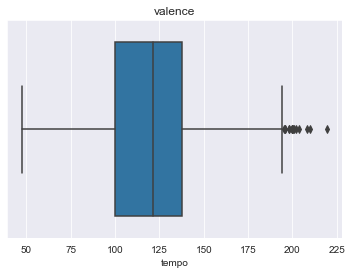

In [172]:
sns.boxplot(x = features[10], data = df).set_title(t)

Text(0.5, 1.0, 'valence')

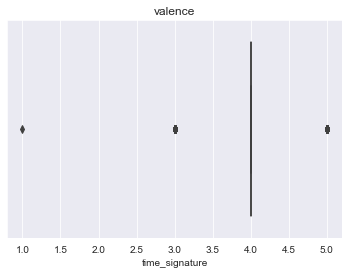

In [173]:
sns.boxplot(x = features[11], data = df).set_title(t)

Text(0.5, 1.0, 'valence')

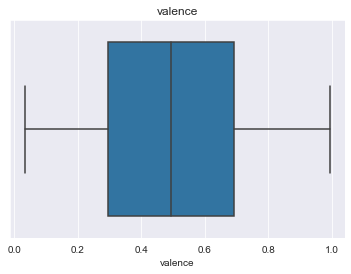

In [174]:
sns.boxplot(x = features[12], data = df).set_title(t)

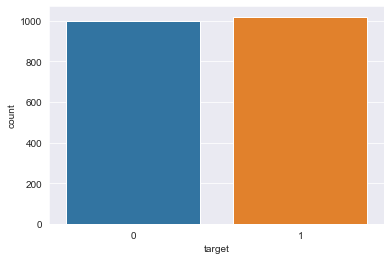

In [73]:
sns.countplot(x = 'target', data = df)

In [68]:
# from sklearn.model_selection import train_test_split, cross_val_score

X = df[features]
# y = df['neighbourhood_group']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 465)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std_train = scaler.fit_transform(X_train)

**PCA**

In [56]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data

pca_components = pca.fit_transform(X_std)
pca_components = pca.fit_transform(X_std)

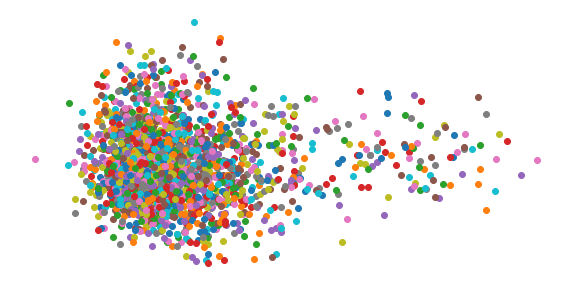

In [44]:
plt.figure(figsize=(10,5))

for i in range(pca_components.shape[0]):
    plt.scatter(pca_components[i, 0], pca_components[i, 1],
#              color=colors[y[i]]
#              fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

**t-SNE**

In [30]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2017 samples in 0.006s...
[t-SNE] Computed neighbors for 2017 samples in 0.057s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2017
[t-SNE] Computed conditional probabilities for sample 2000 / 2017
[t-SNE] Computed conditional probabilities for sample 2017 / 2017
[t-SNE] Mean sigma: 43.872369
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.214252
[t-SNE] KL divergence after 300 iterations: 0.467764


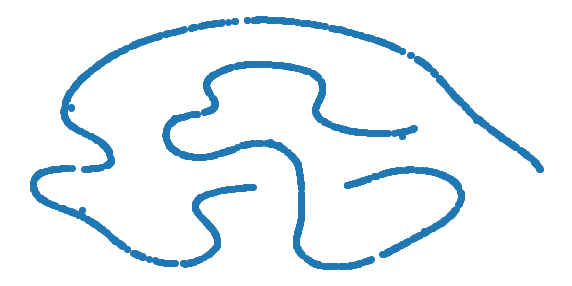

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

There aren't enough features such that running an clustering model takes too long to merit dimensionality reduction, and I don't really get anything from the visualisations...

**K-means**

167 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
101 ms ± 3.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


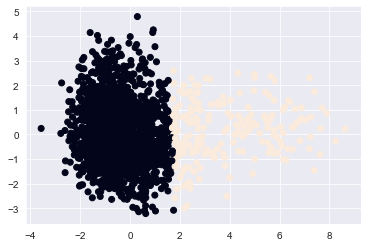

In [79]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=2)
%timeit k_means.fit(X_std_train)
y_pred = k_means.predict(X_std_train)
y_pred_full = k_means.predict(X_std)

# Plot the solution.

# Reduce it to two components for visualization
X_pca = PCA(2).fit_transform(X_std)

k_means2 = KMeans(n_clusters=2)
%timeit k_means2.fit(X_pca)
y_pred2 = k_means2.predict(X_pca)

pca_y_pred = k_means2.predict(X_pca)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred2)
plt.show()

In [89]:
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
# Evaluate the performance of the clusters

from sklearn import metrics

print("ARI score: {}".format(
    metrics.adjusted_rand_score(y, y_pred_full)))

print("Silhouette score: {}".format(
    metrics.silhouette_score(X_std, y_pred_full, metric='euclidean')))

ARI score: 0.005642664876312663
Silhouette score: 0.31606854396465145


In [86]:
# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred_full, y))

Comparing k-means clusters against the data:
target    0    1
row_0           
0       861  950
1       136   70


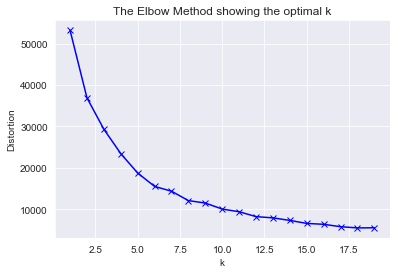

In [52]:
from scipy.spatial.distance import cdist
# Use the elbow method to see what is the optimal amount of clusters.

# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])

# Plot the elbow
sns.set_style('darkgrid')
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

It looks like 7 clusters might be ideal judging from the elbow. I'll see how the ARI and Silhoutte scores look.

In [129]:
k_means7 = KMeans(n_clusters=5)
%timeit k_means7.fit(X_std)
y7_pred = k_means7.predict(X_std_train)
y7_pred_full = k_means7.predict(X_std)

307 ms ± 25.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [130]:
print("Silhouette score: {}".format(
    metrics.silhouette_score(X_std, y7_pred_full, metric='euclidean')))

Silhouette score: 0.11103926746939909


In [120]:
# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y7_pred_full, y))

Comparing k-means clusters against the data:
target    0    1
row_0           
0        38   33
1       277  191
2        76   13
3       327  309
4        36  176
5       188  152
6        55  146


Not much better, I'll stick with 2. Spoiler alert, despite having a pretty low Silhouette score the K-means model seems to perform better than the models explored below. So I'll take this one and see if it looks like there's any noticable differentiation between the assigned clusters and each of the feature values.

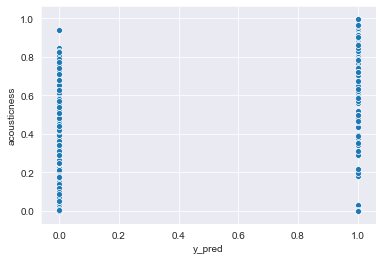

In [153]:
df['y_pred'] = y_pred_full
ax = sns.scatterplot(x = 'y_pred', y = features[0], data = df)


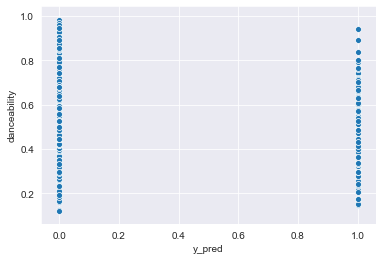

In [134]:
df['y_pred'] = y_pred_full
sns.scatterplot(x = 'y_pred', y = features[1], data = df)

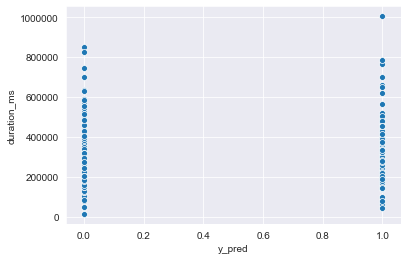

In [137]:
df['y_pred'] = y_pred_full
sns.scatterplot(x = 'y_pred', y = features[2], data = df)

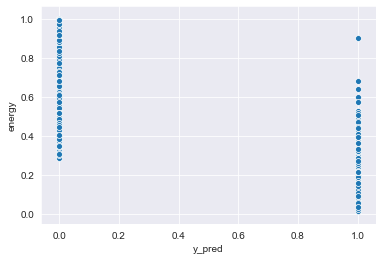

In [138]:
df['y_pred'] = y_pred_full
sns.scatterplot(x = 'y_pred', y = features[3], data = df)

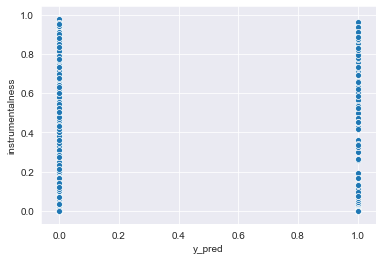

In [139]:
df['y_pred'] = y_pred_full
sns.scatterplot(x = 'y_pred', y = features[4], data = df)

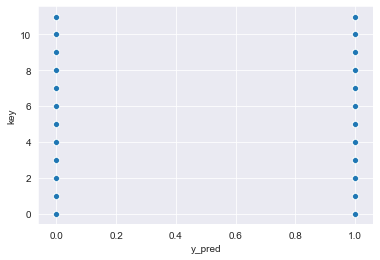

In [140]:
df['y_pred'] = y_pred_full
sns.scatterplot(x = 'y_pred', y = features[5], data = df)

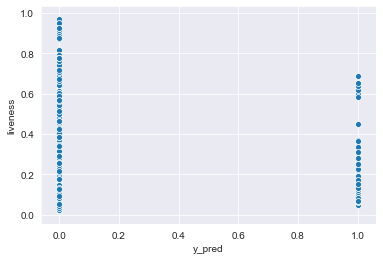

In [141]:
df['y_pred'] = y_pred_full
sns.scatterplot(x = 'y_pred', y = features[6], data = df)

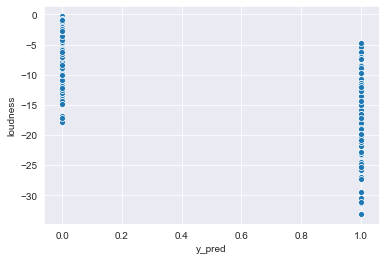

In [142]:
df['y_pred'] = y_pred_full
sns.scatterplot(x = 'y_pred', y = features[7], data = df)

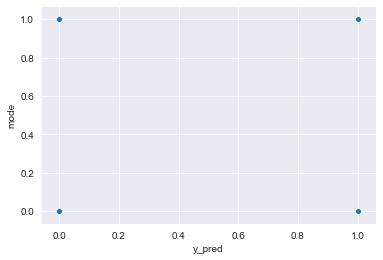

In [143]:
df['y_pred'] = y_pred_full
sns.scatterplot(x = 'y_pred', y = features[8], data = df)

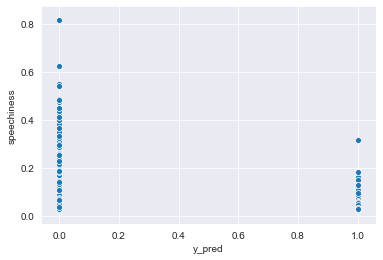

In [144]:
df['y_pred'] = y_pred_full
sns.scatterplot(x = 'y_pred', y = features[9], data = df)

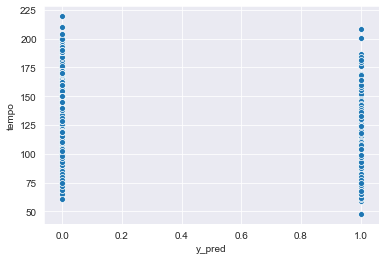

In [145]:
df['y_pred'] = y_pred_full
sns.scatterplot(x = 'y_pred', y = features[10], data = df)

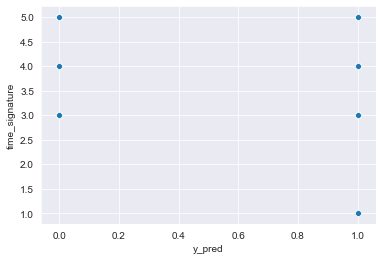

In [146]:
df['y_pred'] = y_pred_full
sns.scatterplot(x = 'y_pred', y = features[11], data = df)

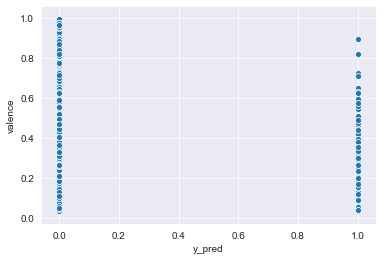

In [147]:
df['y_pred'] = y_pred_full
sns.scatterplot(x = 'y_pred', y = features[12], data = df)

None of these show anything particularly useful.

**Hierarchical**

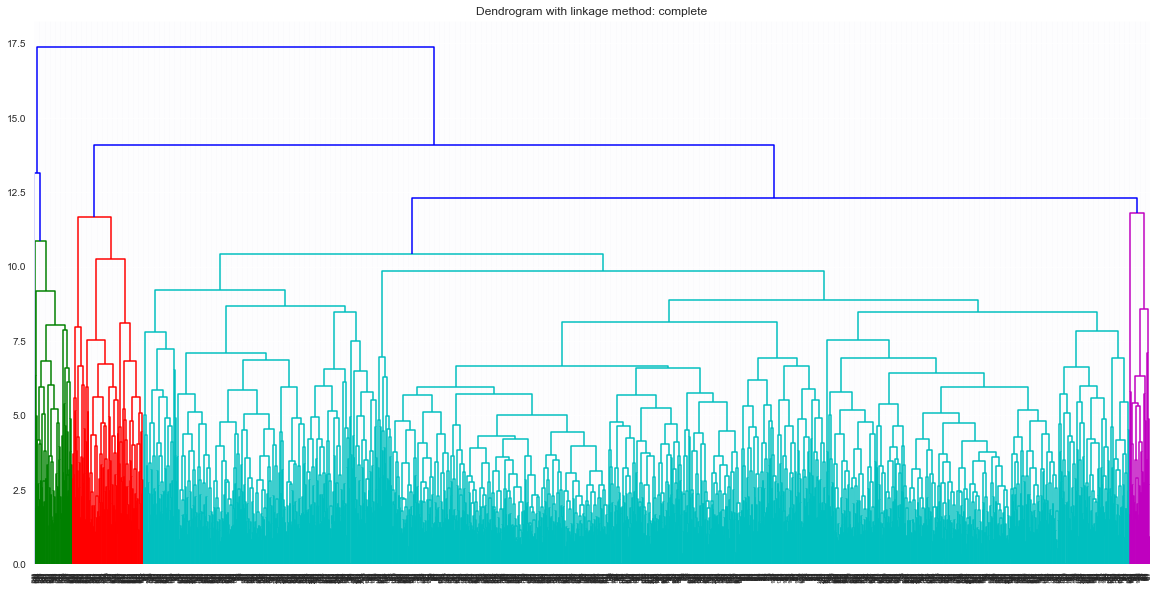

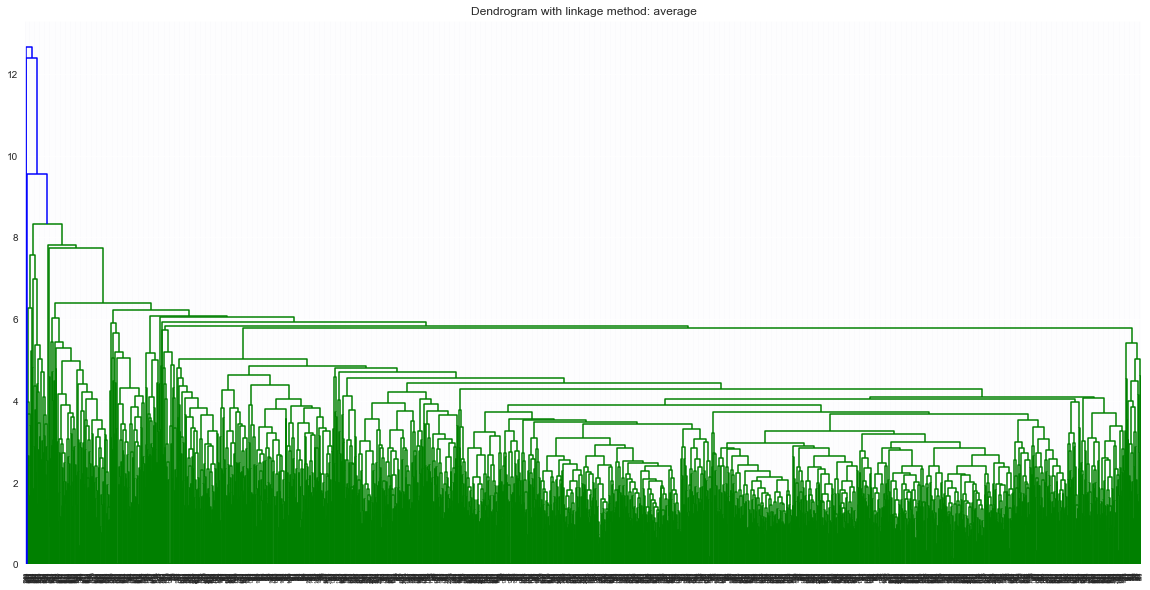

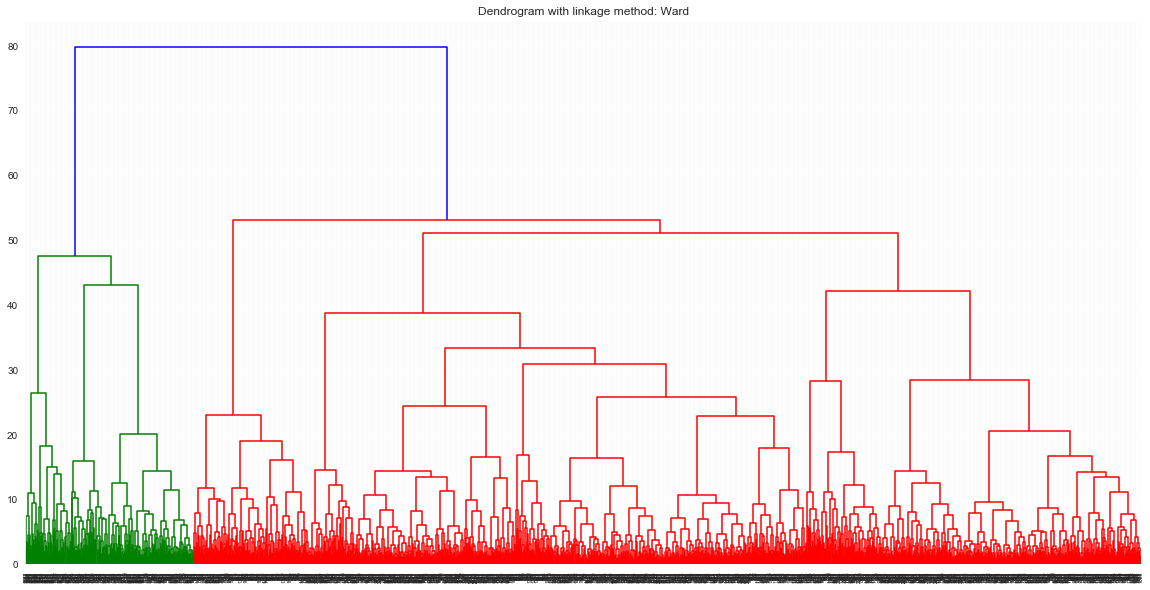

In [158]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: complete")
dendrogram(linkage(X_std, method='complete'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X_std, method='average'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: Ward")
dendrogram(linkage(X_std, method='ward'))
plt.show()

In [160]:
from sklearn.cluster import AgglomerativeClustering


linkage_methods = ["ward", "average", "complete"]

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score of linkage method average: 0.009044420031314537
Silhouette score of linkage method average: 0.26077665287622037
------------------------------------------------
ARI score of linkage method complete: 0.028186839915227562
Silhouette score of linkage method complete: 0.036863308656164204
------------------------------------------------
ARI score of linkage method ward: 0.010218286937206843
Silhouette score of linkage method ward: 0.24817171964251797


**GMM**

In [76]:
from sklearn.mixture import GaussianMixture

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score: 0.003717681209091045
Silhouette score: 0.34396971845840846


In [77]:

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="full")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=full: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="tied")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=tied: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="diag")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=diag: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")


# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="spherical")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=spherical: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

ARI score with covariance_type=full: 0.003717681209091045
Silhouette score with covariance_type=full: 0.34396971845840846
------------------------------------------------------
ARI score with covariance_type=tied: 0.005610554581421266
Silhouette score with covariance_type=tied: 0.25556000736339535
------------------------------------------------------
ARI score with covariance_type=diag: 0.0056461239295212485
Silhouette score with covariance_type=diag: 0.33816226267462723
------------------------------------------------------
ARI score with covariance_type=spherical: 0.0018114853496609138
Silhouette score with covariance_type=spherical: 0.23082798337704508
------------------------------------------------------


**DBSCAN**

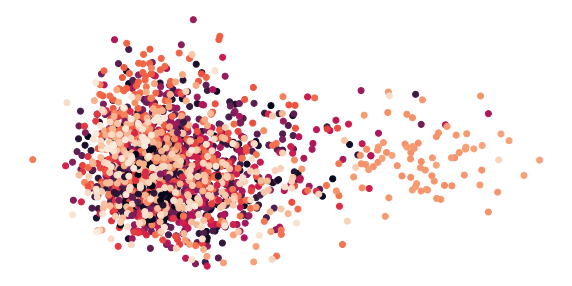

In [155]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
y_pred_full = dbscan_cluster.fit_predict(X_std)


pca = PCA(n_components=2).fit_transform(X_std)
# plt.scatter(pca[:,0], X_pca[:,1], c=clusters)


plt.figure(figsize=(10,5))
plt.scatter(pca[:, 0], pca[:, 1], c = y_pred_full)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [157]:
print("ARI score: {}".format(
    metrics.adjusted_rand_score(y, y_pred_full)))

print("Silhouette score: {}".format(
    metrics.silhouette_score(X_std, y_pred_full, metric='euclidean')))

ARI score: 0.00039399777358099715
Silhouette score: 0.032612535547087956


It seems like this data is pretty hard to cluster. This could potentially be a result of the user having a particularly eclectic taste in mucic, making it hard to pin down the similarities of the underlying chacteristics for any particular group.